In [1]:
import xarray as xr
import numpy
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

In [2]:
def flatten_array(var):
    var_1d = var.stack(stacked=[...]).values
    var_1d = var_1d[~numpy.isnan(var_1d)]
    return var_1d

In [3]:
datapath = '/p/user_pub/e3sm/zhang40/COSP_phase_data'
temp = xr.open_dataset(f'{datapath}/data/T_200001_201412.nc').isel(time=slice(0, 12)).sel(lat=slice(-70,-30))['T']
cice = xr.open_dataset(f'{datapath}/data/CLDICE_200001_201412.nc').isel(time=slice(0, 12)).sel(lat=slice(-70,-30))['CLDICE']
cliq = xr.open_dataset(f'{datapath}/data/CLDLIQ_200001_201412.nc').isel(time=slice(0, 12)).sel(lat=slice(-70,-30))['CLDLIQ']

In [4]:
ctot = cice + cliq
ctot_sel = ctot.where((temp >= 220) & (temp <= 280)).where(ctot > 10e-9)
cliq_sel = cliq.where(ctot_sel.notnull())
temp_sel = temp.where(ctot_sel.notnull())

In [5]:
ctot_1d = flatten_array(ctot_sel)
cliq_1d = flatten_array(cliq_sel)
temp_1d = flatten_array(temp_sel)
lcf = cliq_1d/ctot_1d

In [6]:
# plt.scatter(temp_1d, lcf, s=1)

In [7]:
mean_stat = binned_statistic(temp_1d, lcf, 
                             statistic='mean', 
                             bins=20, 
                             range=(220, 280))

In [8]:
print(mean_stat.statistic)

[1.33430671e-04 7.75871470e-04 3.27872962e-03 1.14291481e-02
 3.14557508e-02 6.75911279e-02 1.24099489e-01 1.90902848e-01
 2.54939031e-01 3.19627502e-01 4.04248094e-01 5.04355375e-01
 6.08106878e-01 7.08044916e-01 8.00572306e-01 8.85095693e-01
 9.50951889e-01 9.84081012e-01 9.94935271e-01 9.98691793e-01]


In [9]:
print(mean_stat.bin_edges)

[220. 223. 226. 229. 232. 235. 238. 241. 244. 247. 250. 253. 256. 259.
 262. 265. 268. 271. 274. 277. 280.]


In [10]:
bin_center = (mean_stat.bin_edges[:-1] + mean_stat.bin_edges[1:]) / 2

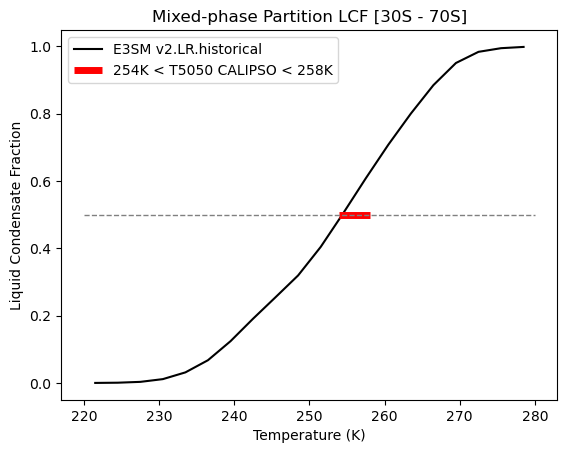

In [13]:
fig, ax = plt.subplots()
ax.plot(bin_center, mean_stat.statistic, color = 'black', label='E3SM v2.LR.historical')
ax.hlines(y=0.5, xmin=254, xmax=258, linewidth=5, color='r', label='254K < T5050 CALIPSO < 258K')
ax.hlines(y=0.5, xmin=220, xmax=280,  linewidth=1, linestyles='--', color='grey')
ax.set_ylabel('Liquid Condensate Fraction')
ax.set_xlabel('Temperature (K)')
ax.legend()
ax.set_title('Mixed-phase Partition LCF [30S - 70S]')
plt.show()


In [54]:
# TODO add CMIP results.
#import scipy.io
#obs = scipy.io.loadmat(f'{datapath}/obs/SCL_T5050_30S_70S.mat')